<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Autocorrelation

_Authors:_

---

### Learning Objectives
 
#### Autocorrelation
**After this lesson, you will be able to:**
- Define autocorrelation and explain why autocorrelation poses a problem for models that assume independence 
- Give examples of autocorrelation in the real world
- Use the pandas `autocorr` function to compute autocorrelation
- Calculate and plot the ACF and PACF using `statsmodels`
---    

### Lesson Guide

#### [Autocorrelation](#py_i)
TODO
- [](#)
----

## Autocorrelation

While in previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.), in time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.

## How do we compute Autocorrelation?

${\Huge R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}^*$

To compute autocorrelation, we fix a lag _k_ which is the delta between the given point and the prior point used to compute the [correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).

With a _k_ value of 1, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one 10 time points earlier.

$^*$ Note that this formula assumes *stationarity*, which we'll talk about shortly

## Guided Practice

Let's look for autocorrelation in data made available by a German drugstore, Rossmann.

These data contains the daily sales made at the drugstore as well as whether a sale or holiday affected the sales data.

Because we are most interested in the Date column (which contains the date of sales for each store), we will make sure to process that as a `DateTime` type, and make it the index of our dataframe.

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


There are over a million sales data points in this dataset, so for some simple EDA we will focus on just one store.

In [3]:
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


## Autocorrelation and the Autocorrelation Function

In previous weeks, our analyses have been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely earlier values relate to values that occur later in time.

Examples of autocorrelation are:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less of an extent.

Below is the formula for the autocorrelation function (ACF):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ and measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$


## Computing Autocorrelation

To compute autocorrelation, we fix a lag, _k_, which is the delta between the given point and the prior point used to compute the correlation.

With a _k_ value of 1, we'd compute how correlated a value is with the value that's immediately prior. With a _k_ value of 10, we'd compute how correlated a variable is with the value that's 10 time points prior.

In [4]:
## Try different lag values -- what do you expect to see?
store1_data['Sales'].autocorr(lag=10)

0.0063076238937893958

Just like with correlation between different variables, the data becomes more correlated as this number moves closer to 1.

## Autocorrelation using `statsmodels`

Statsmodels comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out:

```python
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
```

In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

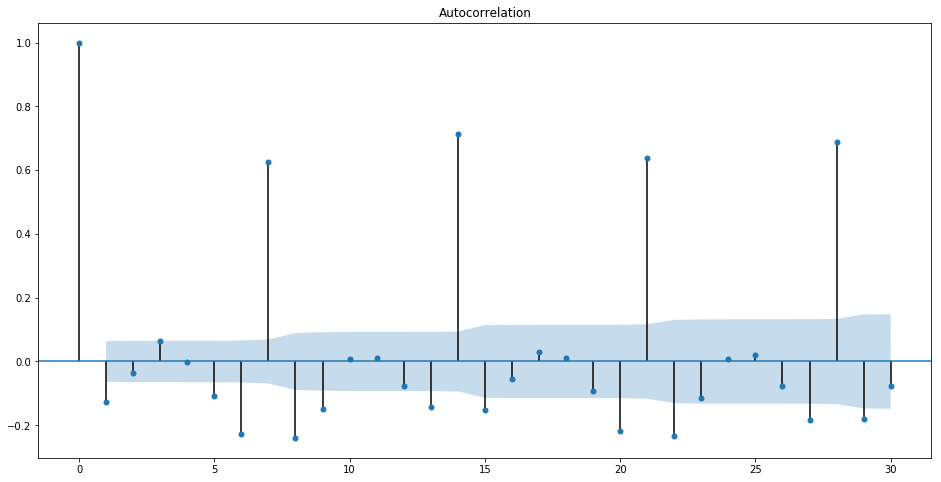

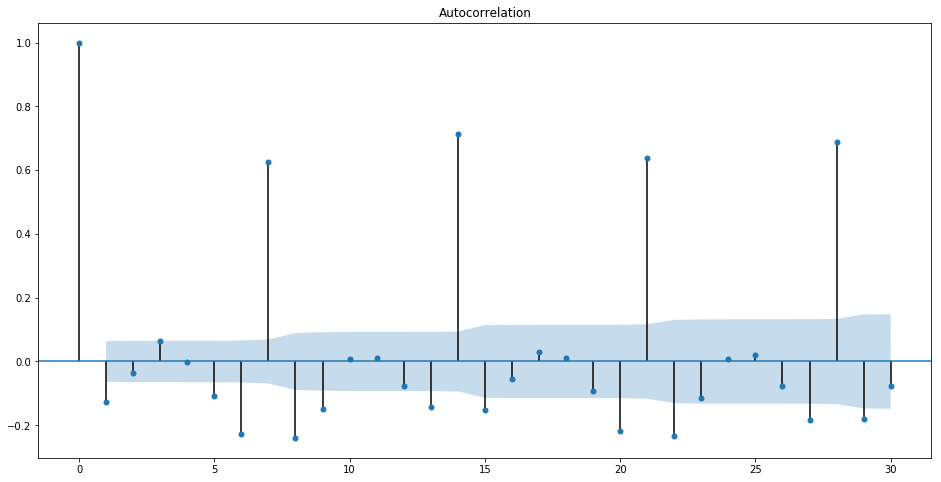

In [12]:
plot_acf(store1_data.Sales.values, lags=30)

In [8]:
acf(store1_data.Sales.values)

array([ 1.        , -0.12703786, -0.03469319,  0.06454937, -0.00180766,
       -0.10904274, -0.22783504,  0.6248786 , -0.2401515 , -0.14869745,
        0.00624578,  0.01006485, -0.07707318, -0.14363042,  0.71435429,
       -0.15188393, -0.05551585,  0.02901103,  0.01113764, -0.09400308,
       -0.21875595,  0.63865175, -0.23360339, -0.11384778,  0.00788378,
        0.02095157, -0.07841381, -0.18374454,  0.68804836, -0.17930762,
       -0.07734379,  0.01060628, -0.00112696, -0.09014802, -0.21435881,
        0.60668328, -0.230107  , -0.12860469,  0.00378231,  0.00237381,
       -0.10721685])

## Partial Autocorrelation and the Partial Autocorrelation Function (PACF) 

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

Load up the sister functions for partial autocorrelation from Statsmodels and test them out on the differenced time series.

```python
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
```

In [13]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

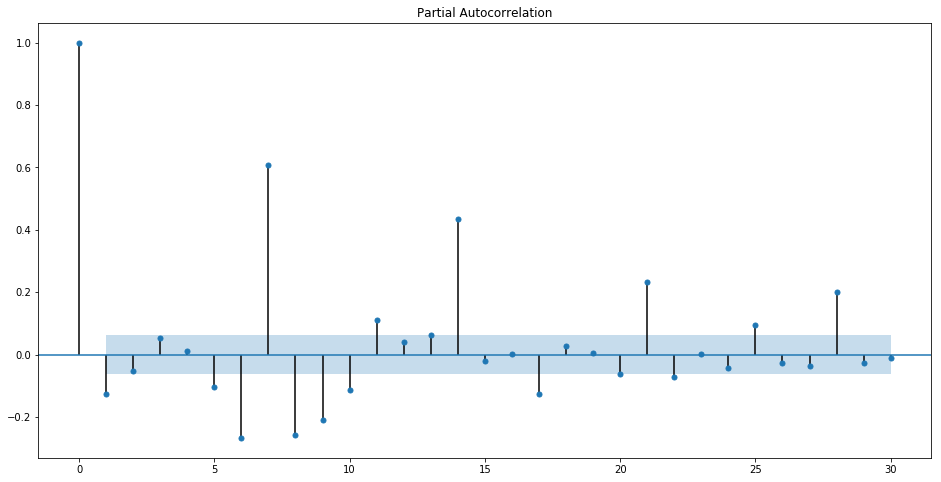

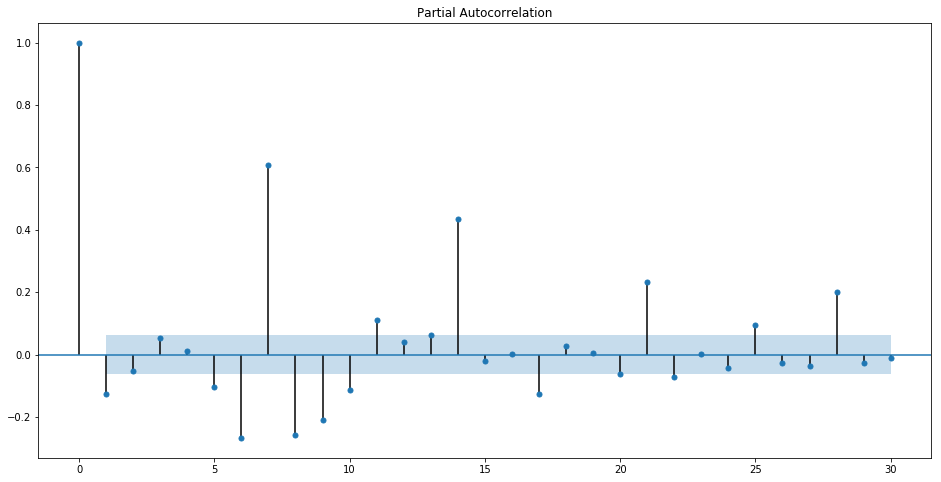

In [14]:
plot_pacf(store1_data.Sales.values, lags=30)

In [15]:
pacf(store1_data.Sales.values)

array([  1.00000000e+00,  -1.27172867e-01,  -5.17773322e-02,
         5.45466222e-02,   1.23214062e-02,  -1.05814185e-01,
        -2.69339271e-01,   6.13891806e-01,  -2.64313948e-01,
        -2.12840451e-01,  -1.14091049e-01,   1.16903523e-01,
         3.98957387e-02,   6.13519367e-02,   4.48132326e-01,
        -2.58046698e-02,  -7.87918641e-04,  -1.32845421e-01,
         3.26825588e-02,   2.08959582e-03,  -6.67821339e-02,
         2.51756307e-01,  -8.03613671e-02,   3.00956887e-03,
        -5.04939348e-02,   1.07025969e-01,  -3.22519598e-02,
        -4.38687145e-02,   2.31052301e-01,  -4.12160559e-02,
        -1.29869374e-02,  -1.28248009e-01,   1.92976513e-02,
         2.41335134e-02,  -1.38720582e-02,   4.87918471e-02,
        -6.34587157e-02,  -3.56958681e-02,  -2.05192404e-02,
         1.72396841e-02,  -1.12545098e-01])

In [ ]:
TODO Independent practice:
    2. Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

In [ ]:
TODO Are sales more correlated with the prior date, a similar date last year, or a similar date last month?
# Compare the following:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

average_daily_sales['Sales'].autocorr(lag=1)

average_daily_sales['Sales'].autocorr(lag=30)

average_daily_sales['Sales'].autocorr(lag=365)